### Computational Intelligence Assignment 2
##### Ostapovich Oleg

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random
import cvxpy

Constants:

In [28]:
nofdots=50
linspace = np.linspace(-10, 10, nofdots)

g = np.array([0, 0, -9.8])
m = 1
mu = 0.8

3 functions:
- PlaneandPlot for task 1,2 to create plane, place legs in random place and plot everything
- SkewMatrix for returning skew matrix
- Forces for solving tasks

In [29]:
def PlaneandPlot(v,w,p):
    x,y = np.meshgrid(linspace, linspace)
    n = np.cross(v,w) / np.linalg.norm(np.cross(v,w))
    if np.abs(n[0,1]) == 1: # Trying to avoid zero division
        x,z = np.meshgrid(linspace, linspace)
        y = np.zeros((nofdots, nofdots)) + p[0, 1]
    else: z = (n[0,0] * (x - p[0,0]) + n[0,1] * (y-p[0,1])) * (-1) / n[0,2]  + p[0,2]
    ax = plt.subplot(projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.plot_surface(x, y, z, alpha = 0.2)
    xd, yd, zd = [], [], []
    for i in range(4):
        index1, index2 = np.random.randint(nofdots), np.random.randint(nofdots)
        xd.append(x[index1,index2]), yd.append(y[index1,index2]), zd.append(z[index1,index2])
    ax.scatter(xd, yd, zd, color='black')
    xdc, ydc, zdc = sum(xd)/4, sum(yd)/4, sum(zd)/4 # Center of 4 dots here is just mean value
    ax.scatter(xdc, ydc, zdc, color='r')
    plt.show()
    return xd,yd,zd, xdc,ydc,zdc, n

In [30]:
def SkewMatrix(v):
    v = v.T
    return np.array([[0, -v[2], v[1]],
              [v[2], 0, -v[0]],
              [-v[1], v[0], 0]], dtype=object)

In [31]:
def Forces(xd,yd,zd,xdc,ydc,zdc,n,v,w):
    plane = np.vstack([v,w])
    r = np.vstack([xd,yd,zd]).T
    rc = np.vstack([xdc,ydc,zdc]).T
    f1 = cvxpy.Variable((3,1))
    f2 = cvxpy.Variable((3,1))
    f3 = cvxpy.Variable((3,1))
    f4 = cvxpy.Variable((3,1))
    obj = cvxpy.Minimize(0)

    constraints = [f1 + f2 + f3 + f4 + m * g[:, None] == 0,
                   SkewMatrix(r[0] - rc) @ f1 + SkewMatrix(r[1] - rc) @ f2 + SkewMatrix(r[2] - rc) @ f3 + SkewMatrix(r[3] - rc) @ f4 == 0,
                   cvxpy.norm2(plane @ f1) <= mu * n @ f1,
                   cvxpy.norm2(plane @ f2) <= mu * n @ f2,
                   cvxpy.norm2(plane @ f3) <= mu * n @ f3,
                   cvxpy.norm2(plane @ f4) <= mu * n @ f4]
    prob = cvxpy.Problem(obj, constraints)
    result = prob.solve()
    if f1.value is not None:
        print("f1 is equal to", f1.value.ravel())
        print("f2 is equal to", f2.value.ravel())
        print("f3 is equal to", f3.value.ravel())
        print("f4 is equal to", f4.value.ravel())
    else:
        print("Robot is unstable")

### Task 1

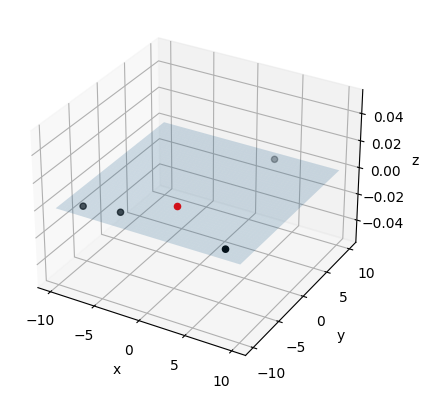

In [32]:
#Creating plane in the same way as it was in first assignment
v = np.array([[1,0,0]])
w = np.array([[0,1,0]])
p = np.array([[0,0,0]])
xd,yd,zd, xdc,ydc,zdc, n = PlaneandPlot(v,w,p)

In [33]:
Forces(xd,yd,zd,xdc,ydc,zdc,n,v,w)

f1 is equal to [0.         0.         2.71476901]
f2 is equal to [0.         0.         2.39658169]
f3 is equal to [0.         0.         2.43739195]
f4 is equal to [0.         0.         2.25125735]


### Task 2

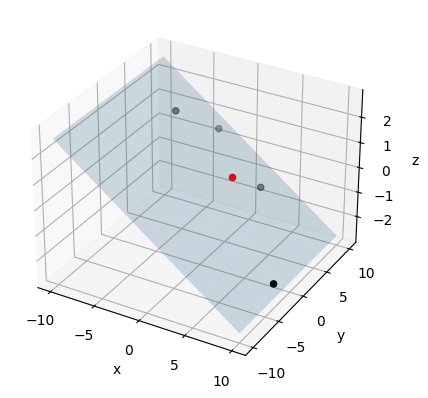

In [34]:
v = np.array([[np.cos(np.pi/12),1,np.sin(-np.pi/12)]])
w = np.array([[0,1,0]])
p = np.array([[0,0,0]])
xd,yd,zd, xdc,ydc,zdc, n = PlaneandPlot(v,w,p)

In [35]:
Forces(xd,yd,zd,xdc,ydc,zdc,n,v,w)

f1 is equal to [-0.04034615  0.002216    2.1931607 ]
f2 is equal to [-0.05341175  0.08862233  2.58784241]
f3 is equal to [-0.01387192 -0.07212766  2.66646442]
f4 is equal to [ 0.10762982 -0.01871068  2.35253247]


### Task 3

I decided not to use previous functions because of there is only a few lines changed in code below

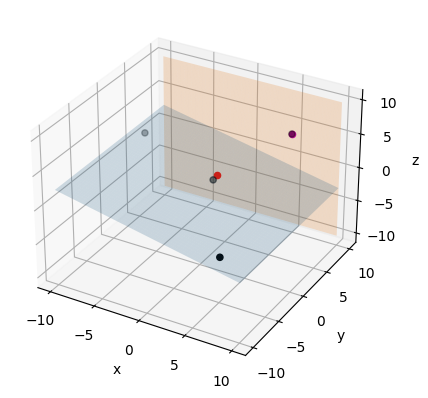

In [38]:
# Creating plane from previous task
v = np.array([[np.cos(np.pi/12),1,np.sin(-np.pi/12)]])
w = np.array([[0,1,0]])
p = np.array([[0,0,0]])
# Calculating that plane
x,y = np.meshgrid(linspace, linspace)
n = np.cross(v,w) / np.linalg.norm(np.cross(v,w))
if np.abs(n[0,1]) == 1:
    x,z = np.meshgrid(linspace, linspace)
    y = np.zeros((nofdots, nofdots)) + p[0, 1]
else: z = (n[0,0] * (x - p[0,0]) + n[0,1] * (y-p[0,1])) * (-1) / n[0,2]  + p[0,2]
ax = plt.subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot_surface(x, y, z, alpha = 0.2)

xd, yd, zd = [], [], []
for i in range(3):
    index1, index2 = np.random.randint(nofdots), np.random.randint(nofdots)
    xd.append(x[index1,index2]), yd.append(y[index1,index2]), zd.append(z[index1,index2])
# Creating vertical plane
v1 = np.array([[1,0,0]])
w1 = np.array([[0,0,1]])
p1 = np.array([[0,10,0]])
# Calculating that plane
x,y = np.meshgrid(linspace, linspace)
n1 = np.cross(v1,w1) / np.linalg.norm(np.cross(v1,w1))
if np.abs(n1[0,1]) == 1:
    x,z = np.meshgrid(linspace, linspace)
    y = np.zeros((nofdots, nofdots)) + p1[0, 1]
else: z = (n1[0,0] * (x - p1[0,0]) + n1[0,1] * (y-p1[0,1])) * (-1) / n1[0,2]  + p1[0,2]
ax = plt.subplot(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot_surface(x, y, z, alpha = 0.2)
# Adding here some points
index1, index2 = np.random.randint(nofdots), np.random.randint(nofdots)
xd.append(x[index1,index2]), yd.append(y[index1,index2]), zd.append(z[index1,index2])
ax.scatter(x[index1,index2], y[index1,index2], z[index1,index2], color='m')
ax.scatter(xd, yd, zd, color='black')
xdc, ydc, zdc = sum(xd)/4, sum(yd)/4, sum(zd)/4 # Center of 4 dots here is just mean value
ax.scatter(xdc, ydc, zdc, color='r')
plt.show()

In [39]:
plane = np.vstack([v,w])
wall = np.vstack([v1,w1])
r = np.vstack([xd,yd,zd]).T
rc = np.vstack([xdc,ydc,zdc]).T
f1 = cvxpy.Variable((3,1))
f2 = cvxpy.Variable((3,1))
f3 = cvxpy.Variable((3,1))
f4 = cvxpy.Variable((3,1))
obj = cvxpy.Minimize(0)

constraints = [f1 + f2 + f3 + f4 + m * g[:, None] == 0,
               SkewMatrix(r[0] - rc) @ f1 + SkewMatrix(r[1] - rc) @ f2 + SkewMatrix(r[2] - rc) @ f3 + SkewMatrix(r[3] - rc) @ f4 == 0,
               cvxpy.norm2(plane @ f1) <= mu * n @ f1,
               cvxpy.norm2(plane @ f2) <= mu * n @ f2,
               cvxpy.norm2(plane @ f3) <= mu * n @ f3,
               cvxpy.norm2(wall @ f4) <= mu * n1 @ f4] # So if dot №4 is on vertical plane so we need to modify constraints
prob = cvxpy.Problem(obj, constraints)
result = prob.solve()
if f1.value is not None:
    print("f1 is equal to", f1.value.ravel())
    print("f2 is equal to", f2.value.ravel())
    print("f3 is equal to", f3.value.ravel())
    print("f4 is equal to", f4.value.ravel())
else:
    print("Robot is unstable")

f1 is equal to [0.2741867  0.05031608 1.60729413]
f2 is equal to [-0.52365983  1.94110524  5.17453128]
f3 is equal to [0.6346871  0.23945568 1.9959797 ]
f4 is equal to [-0.38521398 -2.23087699  1.02219489]


### Task 4

In [40]:
# If leg №2 is pinned to the first plane that means that its friction force is infinite. So i just remove one line from constrains
f1 = cvxpy.Variable((3,1))
f2 = cvxpy.Variable((3,1))
f3 = cvxpy.Variable((3,1))
f4 = cvxpy.Variable((3,1))
obj = cvxpy.Minimize(0)

constraints = [f1 + f2 + f3 + f4 + m * g[:, None] == 0,
               SkewMatrix(r[0] - rc) @ f1 + SkewMatrix(r[1] - rc) @ f2 + SkewMatrix(r[2] - rc) @ f3 + SkewMatrix(r[3] - rc) @ f4 == 0,
               cvxpy.norm2(plane @ f1) <= mu * n @ f1,
               cvxpy.norm2(plane @ f3) <= mu * n @ f3,
               cvxpy.norm2(wall @ f4) <= mu * n1 @ f4]
prob = cvxpy.Problem(obj, constraints)
result = prob.solve()
if f1.value is not None:
    print("f1 is equal to", f1.value.ravel())
    print("f2 is equal to", f2.value.ravel())
    print("f3 is equal to", f3.value.ravel())
    print("f4 is equal to", f4.value.ravel())
else:
    print("Robot is unstable")

f1 is equal to [ 1.09233063 -0.27824445  3.30390762]
f2 is equal to [-2.08388375  5.87820216  1.27752268]
f3 is equal to [ 1.83609721 -0.20179152  3.76147937]
f4 is equal to [-0.84454408 -5.3981662   1.45709033]


### Task 5

![](photo_2023-03-15_23-34-38.jpg)

![](photo_2023-03-15_23-34-41.jpg)